<a href="https://colab.research.google.com/github/GuillenConcepcion/Lab_GC/blob/main/ML_Clustering_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo de agrupamiento DBSCAN

DBSCAN significa agrupamiento espacial basado en densidad de aplicaciones con ruido. Es un algoritmo de agrupamiento basado en densidad, a diferencia de k-means.

Este es un buen algoritmo para encontrar esquemas en un conjunto de datos. Encuentra grupos de forma arbitraria en función de la densidad de puntos de datos en diferentes regiones. Separa las regiones por áreas de baja densidad para poder detectar valores atípicos entre los grupos de alta densidad.

Este algoritmo es mejor que el k-means cuando se trata de trabajar con datos que tienen formas extrañas.

# ¿Cómo funciona DBSCAN?

1. Definición de parámetros:
DBSCAN utiliza dos parámetros clave:

* ε (épsilon): Define el radio de la vecindad alrededor de un punto.

* MinPts: Define el número mínimo de puntos dentro de la vecindad de ε para que un punto se considere un punto central (core point).

2. Clasificación de puntos:
- Puntos centrales: Un punto es un punto central si tiene al menos MinPts dentro de su vecindad de ε.
- Puntos fronterizos: Un punto es un punto fronterizo si está dentro de la vecindad de ε de un punto central, pero no es un punto central por sí mismo.
- Puntos de ruido (o atípicos): Un punto es ruido si no es un punto central ni un punto fronterizo.
3. Formación de clústeres:
Se selecciona un punto de inicio no visitado.
Si es un punto central, se crea un nuevo clúster y se identifican todos los puntos alcanzables directamente desde él (usando los puntos fronterizos y centrales).
Se repite el proceso hasta que no se pueden agregar más puntos al clúster.
Se selecciona otro punto no visitado y se repite el proceso para formar otro clúster, o se marca como ruido si no es un punto central.

## Ventajas de DBSCAN:
- No requiere un número predefinido de clústeres: DBSCAN determina el número de clústeres automáticamente.
- Identifica ruido: Separa los puntos que no pertenecen a ningún clúster (ruido).
- Puede encontrar clústeres de formas arbitrarias: A diferencia de k-means, DBSCAN puede identificar clústeres no convexos.

## Desventajas de DBSCAN:
- Sensible a la elección de parámetros:
- La selección de ε y MinPts puede ser crucial para obtener resultados significativos.
- Puede tener dificultades con clústeres de densidad variable:
* Si la densidad de los clústeres varía mucho, DBSCAN puede tener problemas para separarlos correctamente.
* Puede ser más lento que otros algoritmos con grandes conjuntos de datos:
* La complejidad de DBSCAN puede hacer que sea más lento que otros algoritmos de agrupamiento en conjuntos de datos muy grandes.

## Aplicaciones de DBSCAN:
- Detección de fraudes: Identificar transacciones sospechosas como valores atípicos.
- Análisis de datos espaciales: Identificar áreas de alta densidad, como zonas con alta criminalidad.
- Análisis de imágenes: Segmentar imágenes agrupando píxeles similares.
- Limpieza de datos: Identificar y eliminar puntos de ruido o valores atípicos.
- Análisis de redes sociales: Agrupar usuarios con patrones de conexión similares.

# Librerias

In [1]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN

# Conjunto de datos

In [2]:
# inicializar el conjunto de datos con el que trabajaremos
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# Modelo

In [3]:
# definir el modelo
dbscan_model = DBSCAN(eps=0.25, min_samples=9)

# Training

In [4]:
# entrenar el modelo
dbscan_model.fit(training_data)

DBSCAN(eps=0.25, min_samples=9)

# Asignación

In [5]:
# asignar cada punto de datos a un grupo
dbscan_result = dbscan_model.fit_predict(training_data)

# Clustering

In [6]:
# obtener todos los grupos únicos
dbscan_clusters = unique(dbscan_result)

# Gráfica

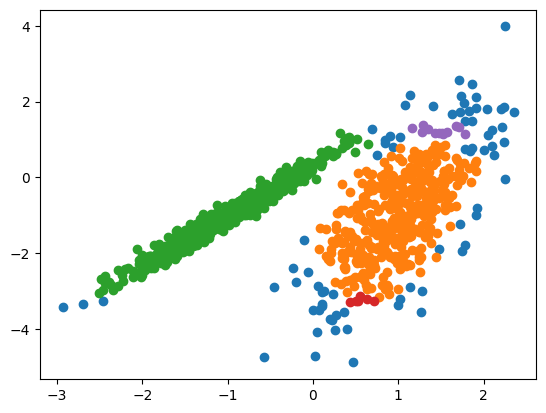

In [7]:
# graficar el DBSCAN de grupos
for dbscan_cluster in dbscan_clusters:
    # obtener todos los puntos de datos que caen en este grupo
    index =where(dbscan_result == dbscan_cluster)
    # hacer el gráfico
    pyplot.scatter(training_data[index, 0], training_data[index, 1])

    # mostrar el gráfico DBSCAN
pyplot.show()